In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from configparser import ConfigParser
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
import seaborn as sns

In [294]:
readPanda= pd.read_csv("Supervised.csv")
display(readPanda)

,Protocol,Length,0,Source,Destination,source port,Destination port,Count,Manual Label
0,TLSv1.2,97,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,1440,0
1,TLSv1.2,97,2020-03-10,89.18.105.60,130.240.134.20,8883,34223,1440,0
2,TLSv1.2,162,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,8,0
3,TLSv1.2,164,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,8,0
4,TLSv1.2,166,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,9,0
...,...,...,...,...,...,...,...,...,...
449,TLSv1.2,206,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,5,1
450,TLSv1.2,239,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,7,1
451,TLSv1.2,240,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,41,1
452,TLSv1.2,971,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,3,1


In [295]:
readPanda.columns.tolist()


['Protocol',
 'Length',
 '0',
 'Source',
 'Destination',
 'source port',
 'Destination port',
 'Count',
 'Manual Label']

In [296]:
newdf=readPanda[['Length', 'source port',
 'Destination port',
 'Count',
 'Manual Label']]

<AxesSubplot:>

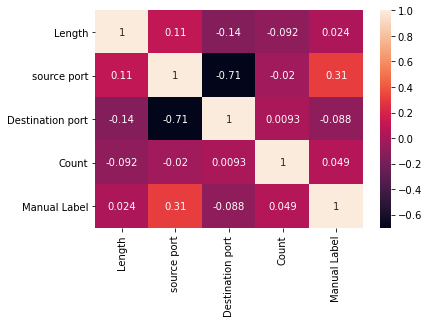

In [297]:
sns.heatmap(newdf.corr(), annot= True)


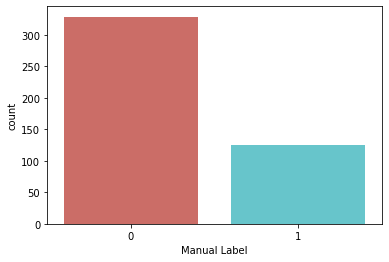

In [298]:
sns.countplot(x = 'Manual Label', data =newdf, palette = 'hls')
plt.show()

In [299]:
X = newdf.drop('Manual Label', axis=1)
y = newdf['Manual Label']

In [300]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape

(363, 4)

In [301]:
X_test.to_csv('ram.csv')

In [302]:
#X_test.to_csv('new.csv')

In [303]:
#d1 = {'dates': n['dates'],'Length': n['Length'],'Count': n['packtLDaily_Count'], 'label': y_pred }
#result1 = pd.DataFrame(d1)

In [304]:
#result1[result1['label']==1]


In [305]:
#

In [306]:
#d = {'dates': n['dates'],'Length': n['Length'],'Count': n['packtLDaily_Count'], 'label': y_pred1}
#result = pd.DataFrame(d)

In [307]:
#result[result['label']==1]


In [308]:
#result.to_csv('result.csv')

In [309]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=15)
#classifier1 = DecisionTreeClassifier()
#classifier1.fit(X_train, y_train)
classifier.fit(X_train, y_train)
model= classifier.fit(X_train, y_train)


In [310]:
kf2 = KFold(n_splits=10,shuffle=True)
kf2.split(X) 

<generator object _BaseKFold.split at 0x7f90f0308a98>

In [329]:
accuracy_model2 = []

array = [[0,0],[0,0]]
best_accuracy=0
# Iterate over each train-test split
for train_index, test_index in kf2.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    y_pred = classifier.predict(X_test)
 
    
    #fit the ensemble model and build the trees
    #confusion_ma.append(np.array(confusion_matrix(y_test, y_pred)))
    # Append to accuracy_model the accuracy of the model
    accuracy_model2.append(accuracy_score(y_test, y_pred, normalize=True)*100)
    if accuracy_score(y_test, y_pred, normalize=True)*100 > best_accuracy:
        G=y_pred
        h=y_test
        i=X_test
        

    #print(matthews_corrcoef(y_pred, y_test))
    print(classification_report(y_test, y_pred))
    #print(confusion_ma)
    c= confusion_matrix(y_test, y_pred)
    print(c)
    array = array + c
# Print the accuracy    
print(accuracy_model2)
print(np.mean(accuracy_model2))



              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.85      0.92        13

    accuracy                           0.96        46
   macro avg       0.97      0.92      0.94        46
weighted avg       0.96      0.96      0.96        46

[[33  0]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       1.00      0.61      0.76        18

    accuracy                           0.85        46
   macro avg       0.90      0.81      0.82        46
weighted avg       0.88      0.85      0.84        46

[[28  0]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.83      0.91        12

    accuracy                           0.96        46
   macro avg       0.97      0.92      0.94        46
weighted avg       0.96      0.96   

In [330]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(h, G)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.80


Text(0.5, 1.0, '2-class Precision-Recall curve: ')

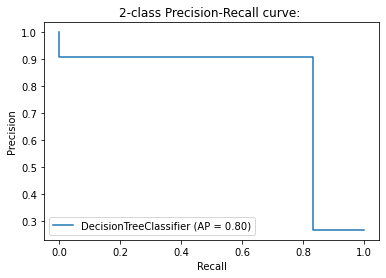

In [331]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, i, h)
disp.ax_.set_title('2-class Precision-Recall curve: ')


In [22]:
import pickle
pickle.dump(model,open("model1.pkl","wb"))

In [26]:
testdata = pd.read_csv('ram.csv').values

In [30]:
unscaled_testdata = np.delete(testdata, [0], axis=1)


In [31]:
unscaled_testdata

array([[  186, 34223,  8883,    92],
       [  193, 34223,  8883,   108],
       [  390, 34223,  8883,     8],
       [   99, 34223,  8883,     2],
       [  185, 34223,  8883,     4],
       [  212, 34223,  8883,     3],
       [   97, 36655,  8883,  1306],
       [  165, 36655,  8883,    27],
       [  172, 36655,  8883,   182],
       [  283, 36655,  8883,    13],
       [  183, 34223,  8883,     6],
       [  193, 34223,  8883,    17],
       [  206, 34223,  8883,    13],
       [  393, 34223,  8883,     1],
       [  976, 34223,  8883,    20],
       [  283, 36655,  8883,    15],
       [  393, 36655,  8883,     1],
       [  166, 34223,  8883,     9],
       [  185, 34223,  8883,     1],
       [  239, 34223,  8883,     3],
       [  976, 34223,  8883,    20],
       [  978, 34223,  8883,   320],
       [  240, 44117,  8883,    49],
       [  259, 44117,  8883,     2],
       [  177, 44117,  8883,    15],
       [  185, 44117,  8883,     7],
       [  967, 44117,  8883,     6],
 

In [33]:
with open('model1.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [36]:
prediction = loaded_model.predict(unscaled_testdata)


In [37]:
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0])

Confusion matrix, without normalization


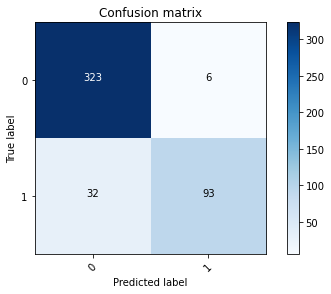

In [31]:
import itertools
def plot_confusion_matrix(array, label,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(array, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(label))
    plt.xticks(tick_marks, label, rotation=45)
    plt.yticks(tick_marks, label)

    fmt = '.2f' if normalize else 'd'
    thresh = array.max() / 2.
    for i, j in itertools.product(range(array.shape[0]), range(array.shape[1])):
        plt.text(j, i, format(array[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if array[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(array,label=[0, 1],title='Confusion matrix')


In [24]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df
# Predict for multiple observations


,Actual,Predicted
2,0,0
5,0,0
9,0,0
16,0,0
24,0,0
45,0,0
55,0,0
72,0,0
90,0,0
106,1,1


In [25]:
y_test

2      0
5      0
9      0
16     0
24     0
45     0
55     0
72     0
90     0
106    1
114    0
127    0
129    0
133    0
137    0
141    0
165    0
168    0
171    0
172    0
194    0
206    0
214    1
216    1
233    0
251    1
254    1
280    1
288    0
295    0
305    0
314    1
347    1
352    1
356    1
357    1
361    1
370    1
376    1
396    1
399    1
413    1
421    1
Name: label, dtype: int64

In [26]:
d1 = {'dates': n['dates'],'Length': n['Length'],'Count': n['packtLDaily_Count'], 'label':pred}
result1 = pd.DataFrame(d1)

NameError: name 'n' is not defined

In [27]:
accuracy_decision_tree = accuracy_score(y_pred1, y_test)
print(accuracy_decision_tree)

NameError: name 'y_pred1' is not defined

In [ ]:
'''
import socket, struct

def ip2int(ip):
    """
    Convert an IP string to int
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

'''


In [ ]:
#newdf['ip_source'] = newdf.Source.apply(ip2int)
#newdf['ipdestination'] = newdf.Destination.apply(ip2int)

In [ ]:
punjabi love moviespunjabi love moviespunjabi love moviespunjabi love moviespunjabi love moviesfrom sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score

alg=IsolationForest()
model3 = alg.fit(X_train, y_train)



accuracy_model3 = []
 
# Iterate over each train-test split
for train_index, test_index in kf2.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    preds = model3.predict(X_test)
    # Train the model
    #classifier.fit(X_train, y_train)
   
    #fit the ensemble model and build the trees

    # Append to accuracy_model the accuracy of the model
    accuracy_model3.append(accuracy_score(y_test, preds, normalize=True)*100)
    print(confusion_matrix(y_test, preds))
    #print(matthews_corrcoef(y_pred, y_test))
    print(classification_report(y_test, preds))
 
# Print the accuracy    
print(accuracy_model3)



In [ ]:
print(np.mean(accuracy_model3))
